In [2]:
import pandas as pd, numpy as np

In [3]:
from scipy.stats import zscore

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
def readPrepareData(filename="finalDF_56_4_SAME_SAME_SAME_.txt"):
    labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")

    feats = pd.read_csv(
        "../06_Feature Extraction/finalDF_56_4_SAME_SAME_SAME_.txt"
        , sep="\t"
    ).set_index("Subject_ID")
    feats.index = map(lambda x: x[:-1] ,feats.index)
    #feats= feats[feats.columns[:-1]]

    feats = feats.sort_index()

    joinedDF = feats.join(labels,how="inner")

    
    return feats,labels,joinedDF

In [8]:
feats,labels,joinedDF = readPrepareData()

In [9]:
joinedDF.shape

(96, 88)

In [32]:
corrs = joinedDF[feats.columns].corr()

In [33]:
corrs.shape

(84, 84)

In [37]:
corrs_abs = corrs.abs()

In [14]:
corrs = corrs.sort_values("RT_mean")

In [33]:
order = list(corrs.index)
order.reverse()

In [48]:
joinedDF_z = joinedDF.apply(zscore)

In [44]:
joinedDF.isna().sum().sum()

0

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralBiclustering

In [17]:
corrs_abs = corrs.abs()

# Plot

In [39]:
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

In [ ]:
n_clusters = 3

model = SpectralBiclustering(n_clusters=n_clusters,method='log',
                             random_state=0).fit(corrs_abs)

order_data = np.argsort(model.row_labels_)

corrs_resorted = corrs.iloc[order_data,order_data]

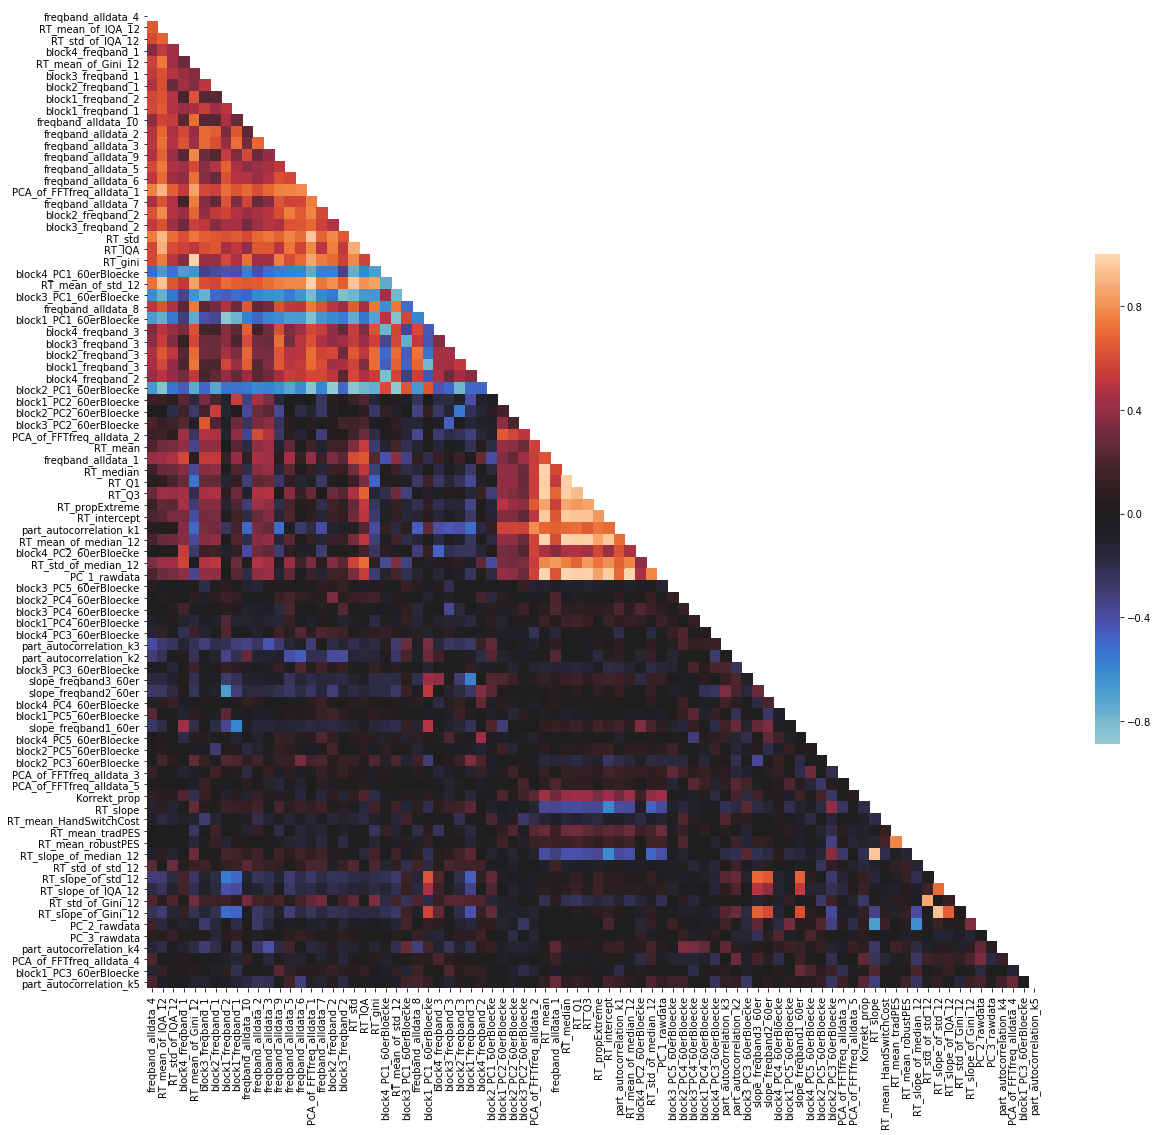

In [46]:
fig, ax = plt.subplots(figsize=(20,18))         # Sample figsize in inches

sns.heatmap(corrs_resorted, mask=mask,
             center=0,
    xticklabels=True, yticklabels=True,cbar_kws={"shrink": 0.5},
            ax=ax)